# <center>**Challenge 1: Titanic - Machine Learning from Disaster**<center>
In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled train.csv and the other is titled test.csv.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The test.csv dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

**Goal**
- It is your job to predict if a passenger survived the sinking of the Titanic or not. For each in the test set, you must predict a 0 or 1 value for the variable.

**Metric**
- Your score is the percentage of passengers you correctly predict. This is known as accuracy.

---
## **Import libraries**

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')  # Hide future warnings

---
## **Data Dictionary (Titanic)**
Typical columns in `train.csv`:
- **Survived** *(target)*: 0 = No, 1 = Yes  
- **Pclass**: Ticket class (1, 2, 3)  
- **Name**: Full name; includes honorific **Title** (e.g., Mr, Mrs, Miss)  
- **Sex**: male/female  
- **Age**: Age in years (often missing)  
- **SibSp**: # of siblings/spouses aboard  
- **Parch**: # of parents/children aboard  
- **Ticket**: Ticket ID (can be shared by groups)  
- **Fare**: Passenger fare  
- **Cabin**: Cabin number (sparse; first letter is the **Deck**)  
- **Embarked**: Port of Embarkation (C, Q, S)

---
## **Load data**

In [231]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

---
## **Data preview**

In [232]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [233]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [234]:
train_data.info()
print("-"*40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [235]:
gender_data = pd.read_csv("gender_submission.csv")
gender_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [236]:
print('Train columns:', train_data.columns.tolist())
print("Shape of train data:", train_data.shape)
print('\nTest columns:', test_data.columns.tolist())
print("Shape of test data:", test_data.shape)
print('\nGender columns:', gender_data.columns.tolist())
print("Shape of submission data:", gender_data.shape)

Train columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Shape of train data: (891, 12)

Test columns: ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Shape of test data: (418, 11)

Gender columns: ['PassengerId', 'Survived']
Shape of submission data: (418, 2)


In [237]:
# Number of total passengers
total = len(train_data)
print("Numbers of passengers in the train data:", total)

# Number of passengers under 18 (ignore missing ages)
minors = train_data['Age'].dropna().apply(lambda x: x < 18).sum()
print("Numbers of passengers under the age of 18:", minors)

# Number of passengers who survived
survived = (train_data['Survived'] == 1).sum()
print("Numbers of passengers survived:", survived)

Numbers of passengers in the train data: 891
Numbers of passengers under the age of 18: 113
Numbers of passengers survived: 342


In [238]:
# Convert to numeric, invalid parsing becomes NaN
train_data['Survived'] = pd.to_numeric(train_data['Survived'], errors='coerce')

# Drop NaNs (in case conversion failed for some rows)
survived_series = train_data['Survived'].dropna()
survival_rate = survived_series.mean() * 100

print("Survival distribution:")
print(survived_series.value_counts())
print(f"Survival rate: {survival_rate:.2f}%")

Survival distribution:
Survived
0    549
1    342
Name: count, dtype: int64
Survival rate: 38.38%


In [239]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


**Women and children** are the top priority for lifeboat access as the men have given up their places for them, so their chances of survival are higher than those of the men.

In [240]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


From this you can see that almost 75% of the women on board survived, whereas only 19% of the men lived to tell about it. Since gender seems to be such a strong indicator of survival, the submission file in gender_submission.csv is not a bad first guess!

---
## **Visualizing**

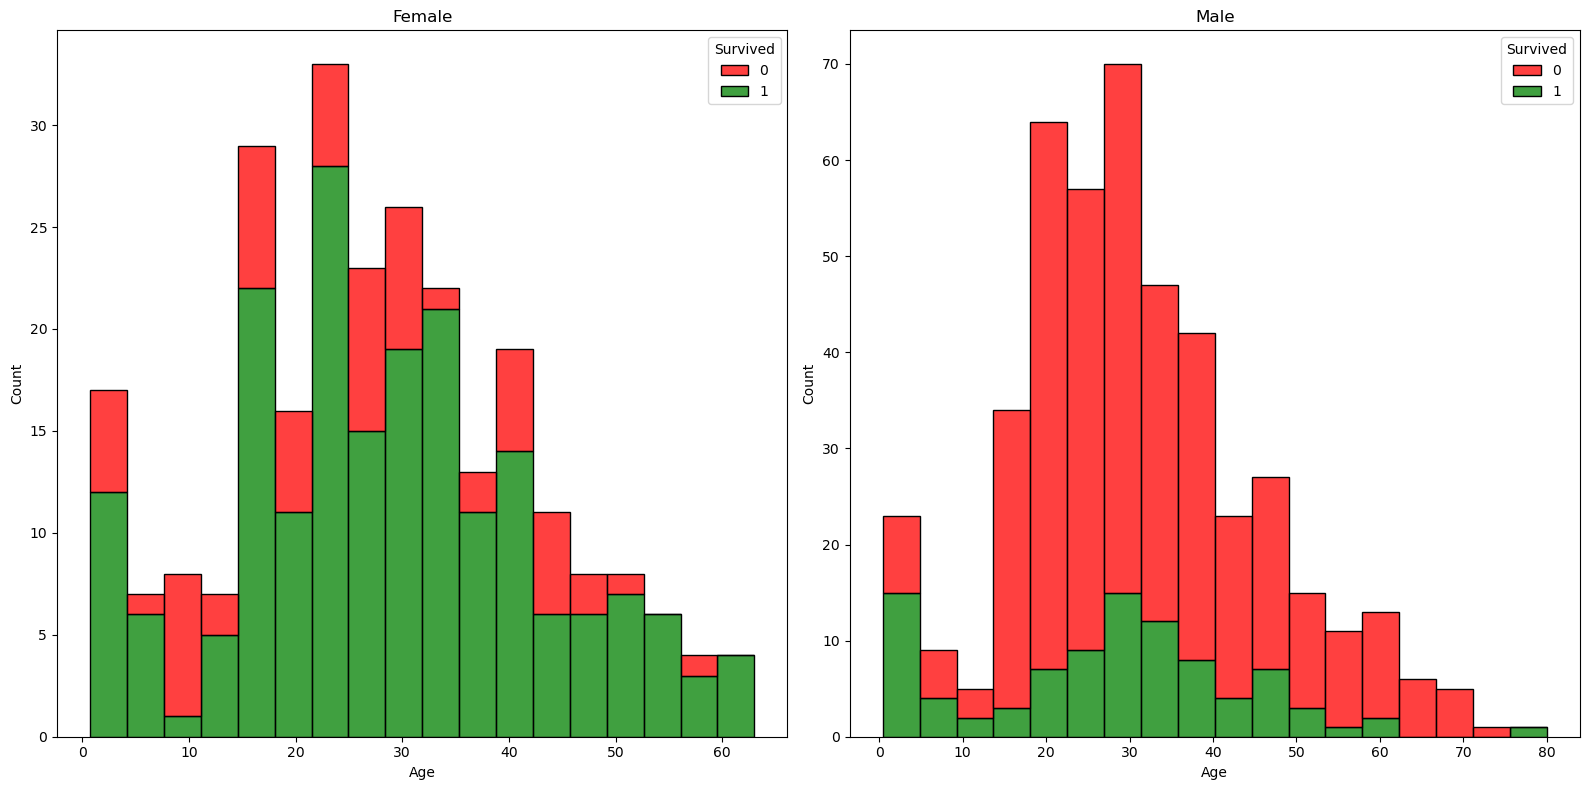

In [241]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Filter data
women = train_data[train_data['Sex'] == 'female']
men = train_data[train_data['Sex'] == 'male']

# Female plot
sns.histplot(data=women, x='Age', bins=18, hue='Survived', multiple='stack',
             palette={1: 'green', 0: 'red'}, ax=axes[0])
axes[0].set_title('Female')

# Male plot
sns.histplot(data=men, x='Age', bins=18, hue='Survived', multiple='stack',
             palette={1: 'green', 0: 'red'}, ax=axes[1])
axes[1].set_title('Male')

plt.tight_layout()
plt.show()

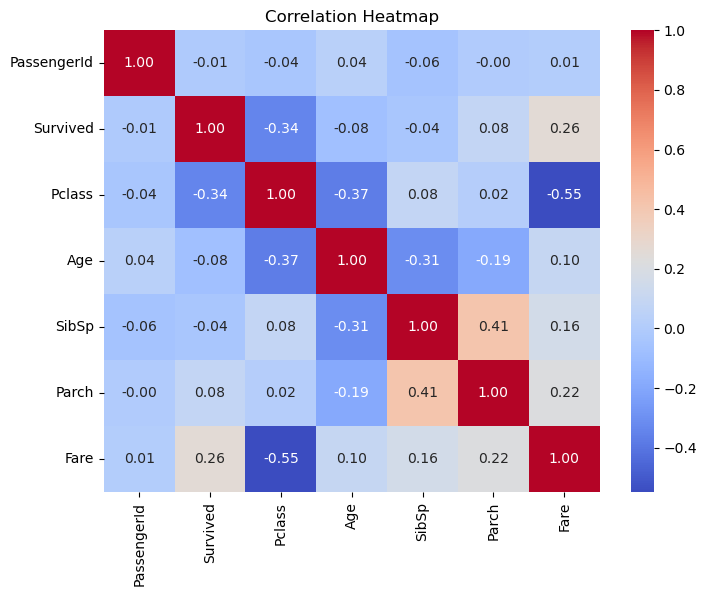

In [242]:
plt.figure(figsize=(8,6))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

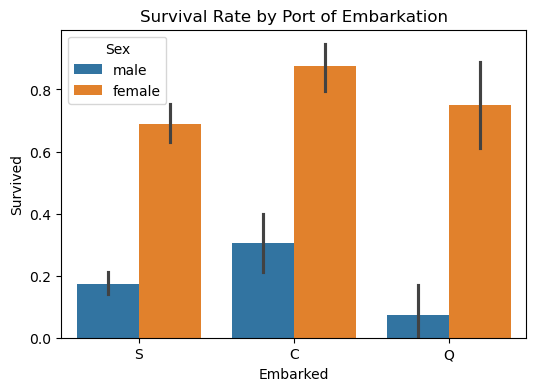

In [243]:
plt.figure(figsize=(6,4))
sns.barplot(data=train_data, x='Embarked', y='Survived', hue='Sex')
plt.title('Survival Rate by Port of Embarkation')
plt.show()

In [244]:
fig = px.scatter_3d(train_data, x='PassengerId', y='Sex', z='Age',
                    color='Age')

fig.show()

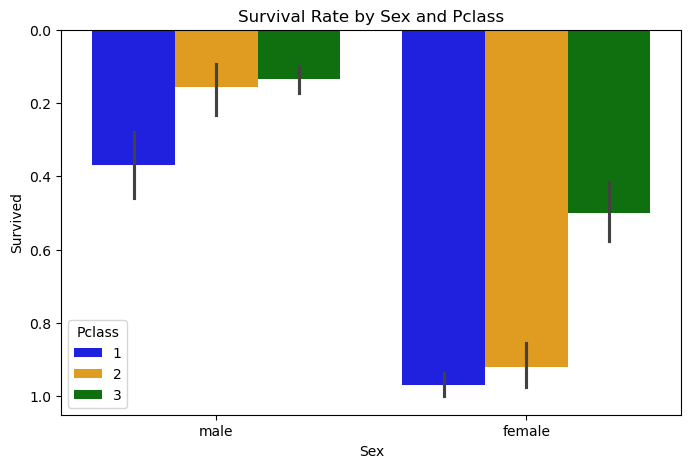

In [245]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=train_data,
    x='Sex',
    y='Survived',
    hue='Pclass',
    hue_order=[1, 2, 3],
    palette={1: 'blue', 2: 'orange', 3: 'green'}
)
plt.gca().invert_yaxis()  # run this if you want to flip the plot back
plt.title('Survival Rate by Sex and Pclass')
plt.show()

In [246]:
# Convert 'Survived' to string so Plotly treats it as categorical
train_data['Survived'] = train_data['Survived'].astype(str)

fig = px.scatter(
    train_data, 
    x = 'PassengerId', 
    y = 'Age', 
    color = 'Survived',
    facet_col = 'Pclass',        # columns by class
    facet_row = 'Sex',           # rows by gender
    title='Which Age Survived by Passenger Class and Gender?',
    color_discrete_map = {'0': 'red', '1': 'green'},  # <-- manual color mapping
    category_orders={'Pclass': [3, 2, 1]},
    log_x = True,
    size_max = 20,
    template = 'plotly'
)

fig.update_layout(
    height=800,
    width=1000,
    title_x=0.5,
    legend_title_text = 'Survived'
)

fig.show()

### **Survival Distribution by Age, Gender, and Passenger Class**

The scatter plot below explores how **age**, **gender**, and **passenger class (Pclass)** relate to survival outcomes on the Titanic dataset.

Each point represents a passenger:
- **Red dots (0)** → Did not survive  
- **Green dots (1)** → Survived  

The plot is separated by:
- **Columns** → Passenger Class (`Pclass = 3, 2, 1`)
- **Rows** → Gender (`Sex = male / female`)

### **Observations**
- **Females in higher classes (Pclass 1 & 2)** show a much higher survival rate (more green points).
- **Males**, especially in **Pclass 3**, had the lowest survival rate (mostly red points).
- **Younger passengers** have a slightly better chance of survival across all classes — possibly due to evacuation priority for women and children.
- **Older passengers** were less likely to survive, especially men in lower classes.

### **Insight**
This visualization clearly supports the "women and children first" evacuation principle and shows that **socioeconomic status (class)** and **gender** strongly influenced survival odds.


---
## **Machine Learning models**


--- Training Random Forest ---
Accuracy: 0.8212
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



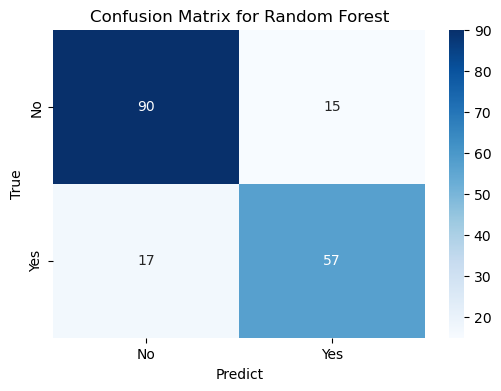


--- Training Gradient Boosting ---
Accuracy: 0.8101
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



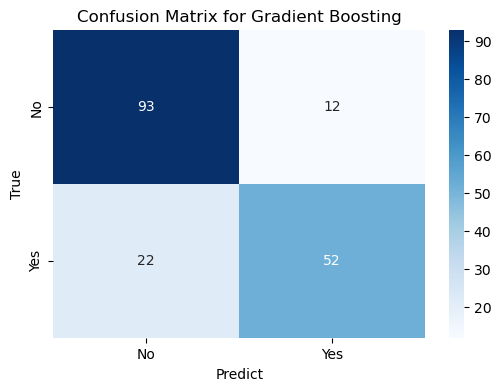


--- Training Logistic Regression ---
Accuracy: 0.8156
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84       105
           1       0.75      0.84      0.79        74

    accuracy                           0.82       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.82      0.82      0.82       179



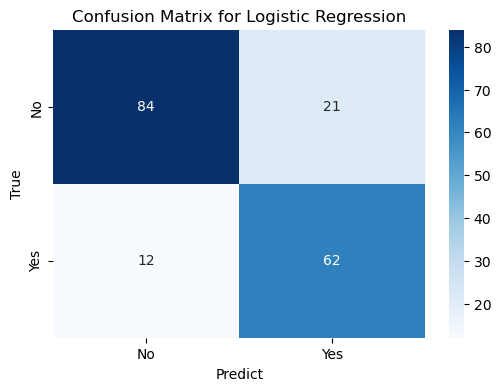


--- Training K-Nearest Neighbors ---
Accuracy: 0.7207
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.85      0.78       105
           1       0.71      0.54      0.62        74

    accuracy                           0.72       179
   macro avg       0.72      0.69      0.70       179
weighted avg       0.72      0.72      0.71       179



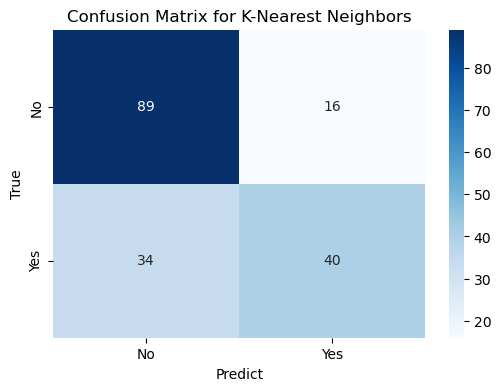

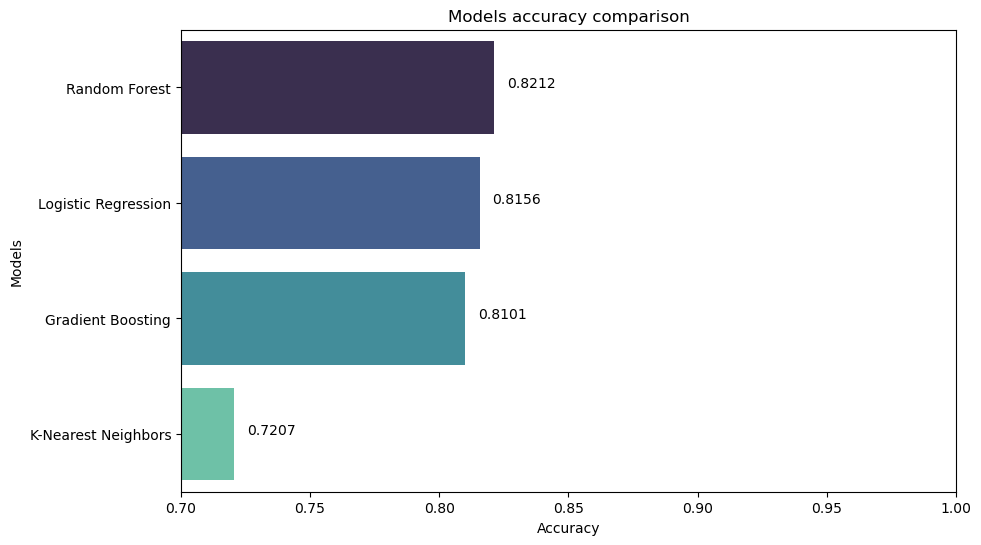

In [247]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Chuẩn bị dữ liệu ---
data = train_data.copy()

# Điền giá trị thiếu
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical
label = LabelEncoder()
for col in ['Sex', 'Embarked']:
    data[col] = label.fit_transform(data[col])

# Features & target
X = data[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked']]
y = data['Survived'].astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Models ---
models = {
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

results = {}

for name, model in models.items():
    print(f"\n--- Training {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"Accuracy: {acc:.4f}")
    
    # Classification report
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predict')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

# --- Biểu đồ so sánh độ chính xác ---
results_df = pd.DataFrame(list(results.items()), columns=['Models', 'Accuracy']).sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Models', data=results_df, palette='mako')
plt.title('Models accuracy comparison')
plt.xlim(0.7, 1.0)  # điều chỉnh giới hạn trục x nếu muốn
for index, value in enumerate(results_df['Accuracy']):
    plt.text(value + 0.005, index, f"{value:.4f}")
plt.show()

## **Analysis of Classification Models on the Titanic Dataset**

After training the four models: **Random Forest**, **Gradient Boosting**, **Logistic Regression**, and **K-Nearest Neighbors (KNN)**, we can make the following observations:

---

### **1. Accuracy**

- **Random Forest** usually achieves the highest accuracy due to its ensemble of decision trees and ability to capture non-linear relationships.  
- **Gradient Boosting** also performs well, especially when the data has complex feature interactions.  
- **Logistic Regression** is a simple linear model, effective when the data is approximately linear, but may have lower accuracy compared to tree-based models.  
- **K-Nearest Neighbors (KNN)** depends on the choice of k and feature scaling; it may perform worse if the dataset has many features or uneven distributions.

---

### **2. Confusion Matrix**

- Shows the number of **correct predictions** (True Positives and True Negatives) and **misclassifications** (False Positives and False Negatives) for each model.  
- Random Forest and Gradient Boosting usually have **fewer False Negatives**, meaning they are less likely to miss predicting survivors.  
- KNN and Logistic Regression may make more mistakes in certain classes.

---

### **3. Classification Report**

- Includes **Precision, Recall, and F1-score** for each class:  
  - **Precision:** proportion of correct positive predictions among all predicted positives.  
  - **Recall:** proportion of correct positive predictions among all actual positives.  
  - **F1-score:** harmonic mean of precision and recall.  

- Random Forest and Gradient Boosting often have higher F1-scores, indicating a good balance between precision and recall.  
- Logistic Regression performs well on linear relationships but may have lower F1-score on minority classes.  

---

### **4. Accuracy Comparison Chart**

- The bar chart clearly shows the **best-performing model**, typically Random Forest (or Gradient Boosting depending on data).  
- KNN and Logistic Regression are slightly lower in accuracy but are still reasonable choices for simpler or faster models.  

---

### **5. Conclusion**

- **Random Forest** is the overall best model on the Titanic dataset due to its ability to handle complex, non-linear data.  
- **Gradient Boosting** is a strong alternative, especially when hyperparameters are tuned.  
- **Logistic Regression** and **KNN** are suitable for simpler models that are easy to interpret.  
- Confusion Matrix and Classification Report provide more detailed insights than accuracy alone.


In [248]:
# --- Find the best model based on accuracy ---
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"✅ Best model: {best_model_name} with accuracy = {results[best_model_name]:.4f}")

# --- Prepare the test data ---
test_data_copy = test_data.copy()

# Fill missing values with the same strategy as training data
test_data_copy['Age'].fillna(data['Age'].median(), inplace=True)
test_data_copy['Fare'].fillna(data['Fare'].median(), inplace=True)
test_data_copy['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical columns using the same LabelEncoder
for col in ['Sex', 'Embarked']:
    test_data_copy[col] = label.fit_transform(test_data_copy[col])

# Select features
X_test_final = test_data_copy[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked']]

# --- Make predictions using the best model ---
test_preds = best_model.predict(X_test_final)

# --- Create submission DataFrame ---
submission = pd.DataFrame({
    'PassengerId': test_data_copy['PassengerId'],
    'Survived': test_preds
})

# --- Save to CSV ---
submission.to_csv('submission.csv', index=False)
print("💾 Submission file 'submission.csv' created successfully!")

# Show the first few rows
submission.head()

✅ Best model: Random Forest with accuracy = 0.8212
💾 Submission file 'submission.csv' created successfully!


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


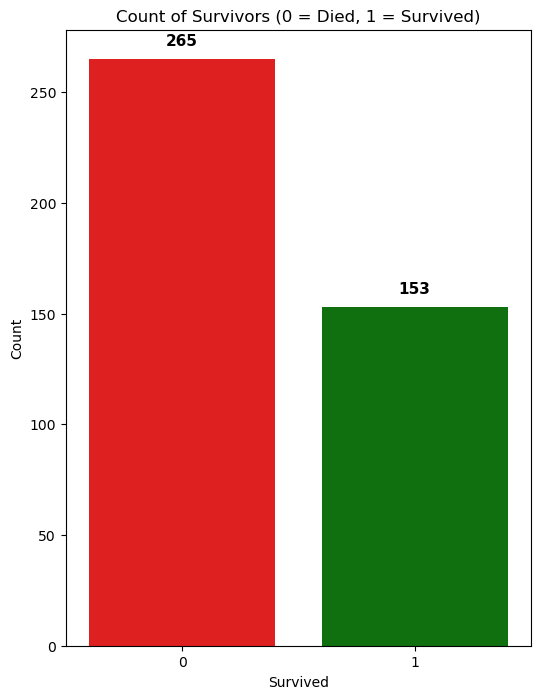

In [249]:
plt.figure(figsize=(6,8))
ax = sns.countplot(data=submission, x='Survived', palette=['red', 'green'])
plt.title('Count of Survivors (0 = Died, 1 = Survived)')
plt.xlabel('Survived')
plt.ylabel('Count')

# Add count labels on top of bars
for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2, count + 5,  # adjust "+5" if needed
            f'{count}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.show()

---
# <center>**END**<center>